# Lab08 - Neural Networks and Deep Learning
Author: [Yunting Chiu](https://www.linkedin.com/in/yuntingchiu/) 

# Install the required packages

In [105]:
import matplotlib.pyplot as plt
import math
import numpy as np
import scipy
#from sklearn import mixture
#from sklearn.model_selection import train_test_split
import tensorflow as tf

# a
Generate and plot a data set $X_1$ (training set) containing 100 points from $w_1$ (50 points from each associated Guassian) and 150 points from $w_2$ (again 50 points from each associated Gaussian). In the same way, generate an additional set $X_2$ (test set).
## Training set $X_1$

In [106]:
# cov = var * identity matrix
# var = 1
# w1
w11_train = np.random.multivariate_normal(mean = [-5, 5], cov = [[1, 0], [0, 1]], size = 50) 
w12_train = np.random.multivariate_normal(mean = [5, -5], cov = [[1, 0], [0, 1]], size = 50)

# w2
w21_train = np.random.multivariate_normal(mean = [-5, -5], cov = [[1, 0], [0, 1]], size = 50)
w22_train = np.random.multivariate_normal(mean = [0, 0], cov = [[1, 0], [0, 1]], size = 50)
w23_train = np.random.multivariate_normal(mean = [5, 5], cov = [[1, 0], [0, 1]], size = 50)

In [107]:
W1 = np.vstack((w11_train, w12_train))
W2 = np.vstack((w21_train, w22_train, w23_train))
X1 = np.vstack((W1, W2))
#len(W2)

### Label each observation and plot
we assume `W1` label is 1, and `W2` label is 0

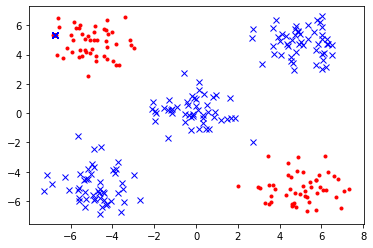

In [108]:
y1 = np.concatenate((np.ones(shape=(1, len(W1))), np.zeros(shape=(1, len(W2)))), axis=-1)

# Training Plot
_ = plt.plot(X1[np.where(y1 == 1), 0], X1[np.where(y1 == 1), 1], 'r.', X1[np.where(y1 == 0), 0], X1[np.where(y1 == 0), 1], 'bx')

In [109]:
"""
# label the data point, w1 = +1, w2 = -1
w1 = np.vstack((w11_train, w12_train))
x_w1, y_w1 = w1, np.ones((len(w1), 1))

w2 = np.vstack((w21_train, w22_train, w23_train))
x_w2, y_w2 = w2, np.zeros((len(w2), 1))
for i in range(len(y_w2)):
  if y_w2[i] == 0:
    y_w2[i] = -1


W1 = np.concatenate((x_w1, y_w1), axis=1)
W2 = np.concatenate((x_w2, y_w2), axis=1)

#data = np.vstack((W1, W2, W1, W2))
#print(data.shape)
#print(data[:, 2:])
X_1 = np.vstack((W1, W2)) # Training set
#np.random.shuffle(X1) # shuffle
#X2 = np.vstack((W1, W2)) # testing set 
#np.random.shuffle(X2) # shuffle

#data = np.vstack((X1, X2))
#print(X1[:, 2:])
"""

'\n# label the data point, w1 = +1, w2 = -1\nw1 = np.vstack((w11_train, w12_train))\nx_w1, y_w1 = w1, np.ones((len(w1), 1))\n\nw2 = np.vstack((w21_train, w22_train, w23_train))\nx_w2, y_w2 = w2, np.zeros((len(w2), 1))\nfor i in range(len(y_w2)):\n  if y_w2[i] == 0:\n    y_w2[i] = -1\n\n\nW1 = np.concatenate((x_w1, y_w1), axis=1)\nW2 = np.concatenate((x_w2, y_w2), axis=1)\n\n#data = np.vstack((W1, W2, W1, W2))\n#print(data.shape)\n#print(data[:, 2:])\nX_1 = np.vstack((W1, W2)) # Training set\n#np.random.shuffle(X1) # shuffle\n#X2 = np.vstack((W1, W2)) # testing set \n#np.random.shuffle(X2) # shuffle\n\n#data = np.vstack((X1, X2))\n#print(X1[:, 2:])\n'

## Testing set $X_2$


In [110]:
# cov = var * identity matrix
# var = 1
# w1
w11_test = np.random.multivariate_normal(mean = [-5, 5], cov = [[1, 0], [0, 1]], size = 50) 
w12_test = np.random.multivariate_normal(mean = [5, -5], cov = [[1, 0], [0, 1]], size = 50)

# w2
w21_test = np.random.multivariate_normal(mean = [-5, -5], cov = [[1, 0], [0, 1]], size = 50)
w22_test = np.random.multivariate_normal(mean = [0, 0], cov = [[1, 0], [0, 1]], size = 50)
w23_test = np.random.multivariate_normal(mean = [5, 5], cov = [[1, 0], [0, 1]], size = 50)

In [111]:
W1 = np.vstack((w11_test, w12_test))
W2 = np.vstack((w21_test, w22_test, w23_test))
X2 = np.vstack((W1, W2))

### Label each observation and plot
we assume `W1` label is 1, and `W2` label is 0

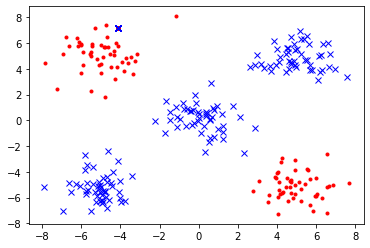

In [112]:
y2 = np.concatenate((np.ones(shape=(1, len(W1))), np.zeros(shape=(1, len(W2)))), axis=-1)

# Training Plot
_ = plt.plot(X2[np.where(y2 == 1), 0], X2[np.where(y2 == 1), 1], 'r.', X2[np.where(y2 == 0), 0], X2[np.where(y2 == 0), 1], 'bx')

I didn't set a seed to generate random numbers, so we can see that `X1` and `X2` are distinct.

In [113]:
print(X1[:5, :]==X2[:5, :])

[[False False]
 [False False]
 [False False]
 [False False]
 [False False]]


## Data Shape

In [114]:
#X1, X2, y1, y2 = train_test_split(data[:, 0:2], data[:, 2:], test_size= 0.5, random_state=100) # 50% for training, 50 for of testing, ans shuffle
#x_train = X1[:, 0:2]
#y_train = X1[:, 2:]
#x_test = X2[:, 0:2]
#y_test = X2[:, 2:]
print("-----the shape of each dataset--------")
print(X1.shape)
print(X2.shape)
print(y1.shape) # should transpose when fitting model
print(y2.shape) # should transpose when fitting model

-----the shape of each dataset--------
(250, 2)
(250, 2)
(1, 250)
(1, 250)


## Plot $X_1$ and $X_2$

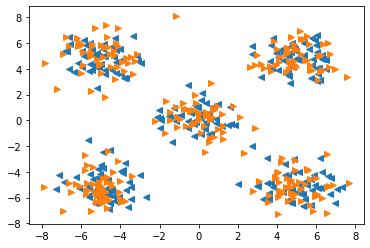

In [115]:
# plt.scatter(x_train[:, 0], x_train[:, 1], c = 'blue')
# plt.scatter(x_test[:, 0], x_test[:, 1], c = 'green')
plt.figure(1)
_ = plt.plot(X1[:, 0], X1[:, 1], '<', X2[:, 0], X2[:, 1], '>')
#_ = plt.plot(X1[np.where(y1 == 1), 0], X1[np.where(y1 == 1), 1], 'r.', X1[np.where(y1 == -1), 0], X1[np.where(y1 == -1), 1], 'bx')

# B
Based on the training set $X_1$, train a two-layer neural network with two nodes in the hidden layer, each one having the rectified linear activation function or ReLU and a single output node with linear activation function using the standard backpropagation algorithm for 6000 iterations and step size equal to 0.01. Compute the training and test errors, based on $X_1$ and $X_2$ respectively. Also, plot the test points as well as the decision lines formed by the network.

## Definition and training of the network

In [137]:
"""
This session is adapted from Dr. Zois Boukouvalas
iter = iteration, lr = learning rate, k = number of hidden layer nodes
"""

def NN(iter, k, lr):
  np.random.seed(100)
  model1 = tf.keras.models.Sequential([
  tf.keras.layers.Dense(2, activation=None, input_dim=2), # model will take as input arrays 2 and output shape 2
  tf.keras.layers.Dense(k, activation="relu"),
  tf.keras.layers.Dense(1, activation=None) # Output layer
  ])
  opt = tf.keras.optimizers.SGD(learning_rate=lr)
  # set model configurations
  model1.compile(optimizer=opt,
                 loss='binary_crossentropy', 
                 metrics=['binary_accuracy'],)

  # give test set as validation data if you want to see accuracy and loss for the test set during training
  batch_size = 6
  # Verbosity mode. 0 = silent, 1 = progress bar, 2 = one line per epoch
  history = model1.fit(X1, y1.T, batch_size=batch_size, epochs=int(iter/batch_size), verbose=0)
  # Test the trained model on the test set. If you passed the test set as validation data during training,
  # test loss & accuracy will be the same to those of the last training epoch for the validation data
  pe_train, accu_train = model1.evaluate(X1, y1.T)
  pe_test, accu_test = model1.evaluate(X2, y2.T)
  print("The accuracy score of training set is {}".format(accu_train))
  print("The accuracy score of testing set is {}".format(accu_test))

  amin, bmin = X2.min(axis=0) - 0.1
  amax, bmax = X2.max(axis=0) - 0.1
  hticks = np.linspace(amin,amax,101)
  vticks = np.linspace(bmin, bmax, 101)
  aa, bb = np.meshgrid(hticks, vticks)
  ab= np.c_[aa.ravel(), bb.ravel()] #flatten
  #make prediction
  c=model1.predict(ab)
  Z=c.reshape(aa.shape)
  plt.figure(figsize=(12,8))
  # plot contour
  plt.contourf(aa,bb,Z, cmap='bwr', alpha = 0.2)
  _=plt.plot(X2[np.where(y2 == 1), 0], X2[np.where(y2 == 1), 1], 'r.', X2[np.where(y2 == 0), 0], X2[np.where(y2 == 0), 1], 'bx')

8/8 [==============================] - 0s 2ms/step - loss: 6.1700 - binary_accuracy: 0.6000 
The accuracy score of training set is 0.6000000238418579
The accuracy score of testing set is 0.6000000238418579


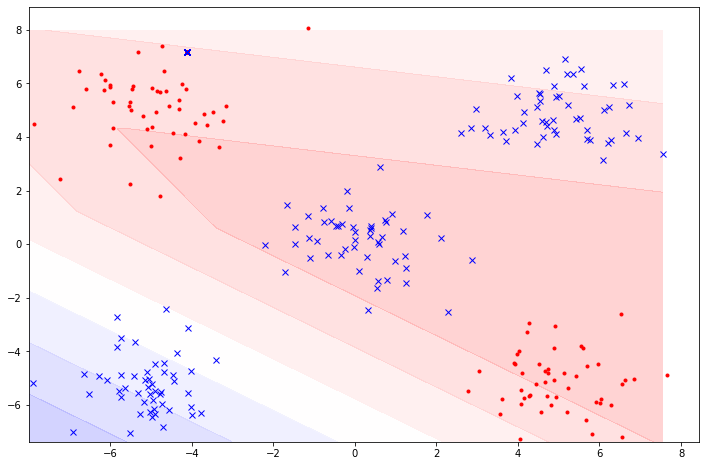

In [138]:
NN(iter=6000, k=2, lr=0.01)

# C

8/8 [==============================] - 0s 2ms/step - loss: 3.0916 - binary_accuracy: 0.7960 
The accuracy score of training set is 0.800000011920929
The accuracy score of testing set is 0.7960000038146973


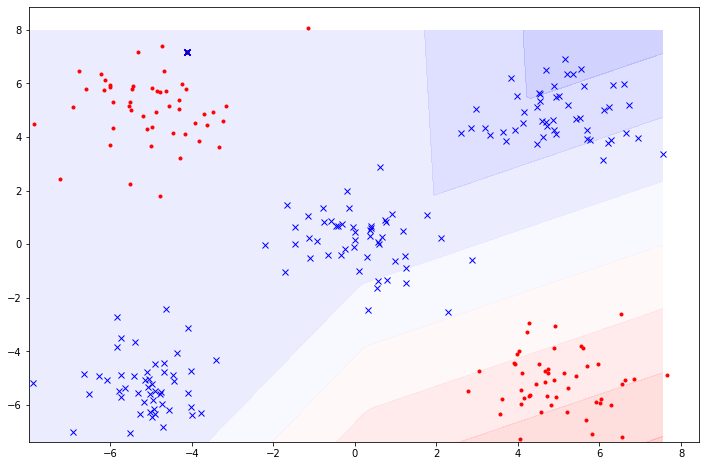

In [139]:
NN(iter=6000, k=2, lr=0.0001)

# D

8/8 [==============================] - 0s 2ms/step - loss: 3.0923 - binary_accuracy: 0.8000 
The accuracy score of training set is 0.800000011920929
The accuracy score of testing set is 0.800000011920929


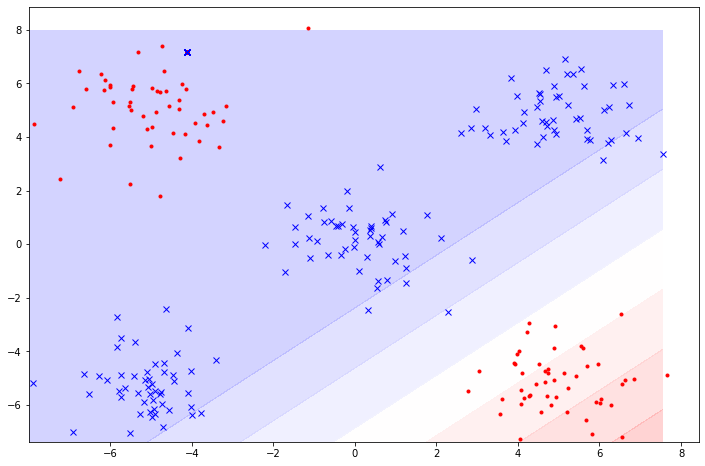

In [140]:
NN(iter=6000, k=1, lr=0.0001)

8/8 [==============================] - 0s 2ms/step - loss: 6.1700 - binary_accuracy: 0.6000 
The accuracy score of training set is 0.6000000238418579
The accuracy score of testing set is 0.6000000238418579


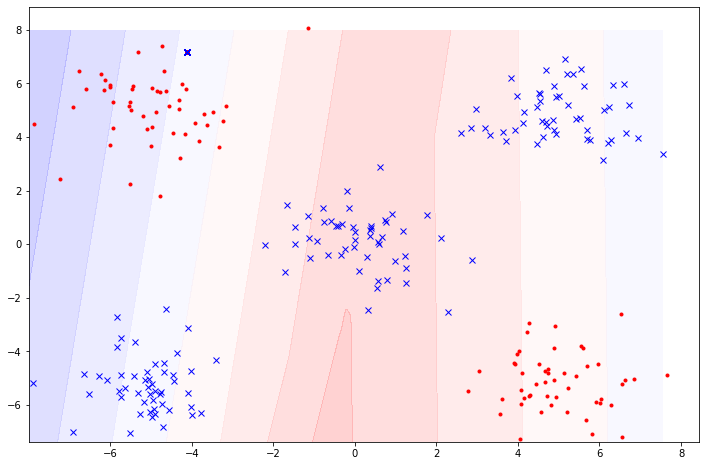

In [141]:
NN(iter=6000, k=4, lr=0.0001)

8/8 [==============================] - 0s 2ms/step - loss: 3.0885 - binary_accuracy: 0.8000
The accuracy score of training set is 0.800000011920929
The accuracy score of testing set is 0.800000011920929


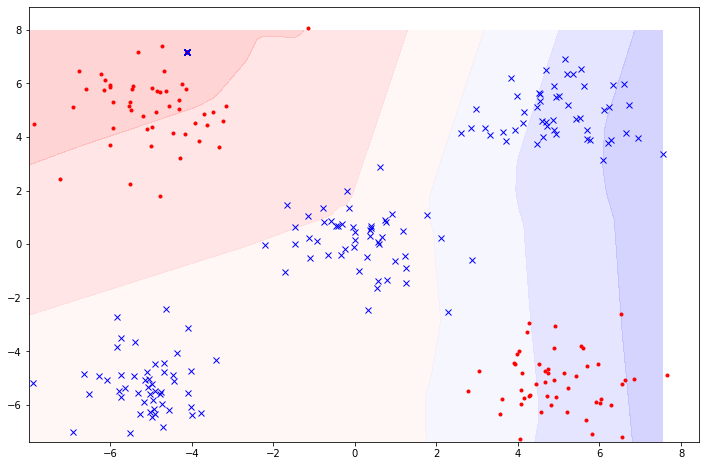

In [142]:
NN(iter=6000, k=20, lr=0.0001)

8/8 [==============================] - 0s 2ms/step - loss: 0.0101 - binary_accuracy: 0.9960
The accuracy score of training set is 1.0
The accuracy score of testing set is 0.9959999918937683


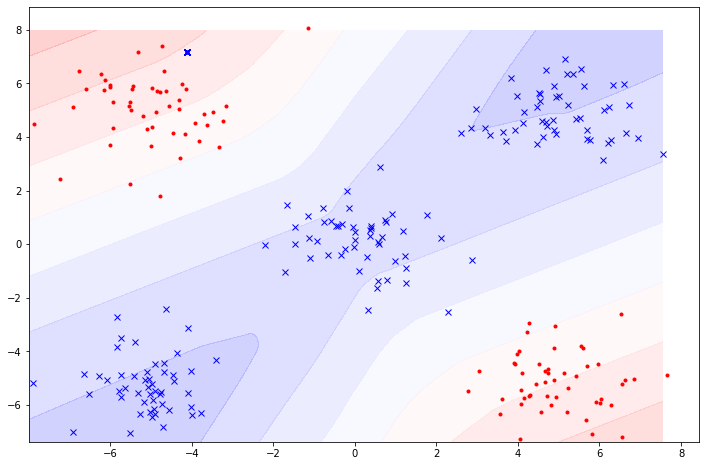

In [149]:
NN(iter=6000, k=50, lr=0.0001)

# Conclusion
In the model, the learning rate and the number of nodes in the hidden layer (k) are important. When the number of k is small, the accuracy is poor. If k is too large, the model will consume an inordinate amount of computing time. Also, when compared to `learning rate = 0.01` in question B, the smaller learning rate `learning rate = 0.0001` appers to perform better, but it is just a case. It is worth thinking about how to define the balance to set up the number of nodes in the hidden layer and learning rate.

# References
- https://towardsdatascience.com/gaussian-mixture-models-with-python-36dabed6212a
- https://towardsdatascience.com/lets-code-a-neural-network-in-plain-numpy-ae7e74410795
- https://machinelearninggeek.com/backpropagation-neural-network-using-python/
- https://github.com/SebastianMantey/Deep-Learning-Tutorial/blob/master/notebooks/04%20-%20Backpropagation%20with%20NumPy.ipynb
- https://www.tensorflow.org/guide/keras/sequential_model

# Testing Zone

In [123]:
"""
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(hidden_layer_sizes=2, max_iter=6000, learning_rate_init=0.01, activation='relu').fit(x_train, y_train)
#clf.predict_proba(x_test[:1])
#clf.predict(x_test[:5, :])
clf.score(x_test, y_test)
"""

"\nfrom sklearn.neural_network import MLPClassifier\nclf = MLPClassifier(hidden_layer_sizes=2, max_iter=6000, learning_rate_init=0.01, activation='relu').fit(x_train, y_train)\n#clf.predict_proba(x_test[:1])\n#clf.predict(x_test[:5, :])\nclf.score(x_test, y_test)\n"

In [124]:
"""
# Initialize variables
np.random.seed(4321)
learning_rate = 0.0001
iterations = 6000
N = y_train.size # 400

# number of input features
input_size = 2

# number of hidden layers neurons
hidden_size = 2

# number of neurons at the output layer
output_size = 2

results = pd.DataFrame(columns=["mse", "accuracy"])

# initializing weight for the hidden layer
W1 = np.random.normal(scale=0.5, size=(input_size, hidden_size))   


# initializing weight for the output layer
W2 = np.random.normal(scale=0.5, size=(hidden_size , output_size)) 
"""

'\n# Initialize variables\nnp.random.seed(4321)\nlearning_rate = 0.0001\niterations = 6000\nN = y_train.size # 400\n\n# number of input features\ninput_size = 2\n\n# number of hidden layers neurons\nhidden_size = 2\n\n# number of neurons at the output layer\noutput_size = 2\n\nresults = pd.DataFrame(columns=["mse", "accuracy"])\n\n# initializing weight for the hidden layer\nW1 = np.random.normal(scale=0.5, size=(input_size, hidden_size))   \n\n\n# initializing weight for the output layer\nW2 = np.random.normal(scale=0.5, size=(hidden_size , output_size)) \n'

In [125]:
"""
# ref: https://machinelearninggeek.com/backpropagation-neural-network-using-python/
for itr in range(iterations):    

  # feedforward propagation
  # on hidden layer
  Z1 = np.dot(x_train, W1)
  A1 = ReLU(Z1)

  # on output layer
  Z2 = np.dot(A1, W2)
  A2 = ReLU(Z2)
    
  # Calculating error
  mse = mean_squared_error(A2, y_train)
  acc = accuracy(A2, y_train)
  results=results.append({"mse":mse, "accuracy":acc},ignore_index= True)

  # backpropagation
  E1 = A2 - y_train
  dW1 = E1 * A2 * (1 - A2)

  E2 = np.dot(dW1, W2.T)
  dW2 = E2 * A1 * (1 - A1)

  # weight updates
  W2_update = np.dot(A1.T, dW1) / N
  W1_update = np.dot(x_train.T, dW2) / N

  W2 = W2 - learning_rate * W2_update
  W1 = W1 - learning_rate * W1_update

results.mse.plot(title="Mean Squared Error")
results.accuracy.plot(title="Accuracy")
"""

'\n# ref: https://machinelearninggeek.com/backpropagation-neural-network-using-python/\nfor itr in range(iterations):    \n\n  # feedforward propagation\n  # on hidden layer\n  Z1 = np.dot(x_train, W1)\n  A1 = ReLU(Z1)\n\n  # on output layer\n  Z2 = np.dot(A1, W2)\n  A2 = ReLU(Z2)\n    \n  # Calculating error\n  mse = mean_squared_error(A2, y_train)\n  acc = accuracy(A2, y_train)\n  results=results.append({"mse":mse, "accuracy":acc},ignore_index= True)\n\n  # backpropagation\n  E1 = A2 - y_train\n  dW1 = E1 * A2 * (1 - A2)\n\n  E2 = np.dot(dW1, W2.T)\n  dW2 = E2 * A1 * (1 - A1)\n\n  # weight updates\n  W2_update = np.dot(A1.T, dW1) / N\n  W1_update = np.dot(x_train.T, dW2) / N\n\n  W2 = W2 - learning_rate * W2_update\n  W1 = W1 - learning_rate * W1_update\n\nresults.mse.plot(title="Mean Squared Error")\nresults.accuracy.plot(title="Accuracy")\n'

In [126]:
"""
# rectified linear function (ReLU)
def ReLU(x):
  return np.maximum(0, x)

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def mean_squared_error(y_pred, y_true):
    return ((y_pred - y_true)**2).sum() / (2*y_pred.size)
    
def accuracy(y_pred, y_true):
    acc = y_pred.argmax(axis=1) == y_true.argmax(axis=1)
    return acc.mean()
"""

'\n# rectified linear function (ReLU)\ndef ReLU(x):\n  return np.maximum(0, x)\n\ndef sigmoid(x):\n    return 1 / (1 + np.exp(-x))\n\ndef mean_squared_error(y_pred, y_true):\n    return ((y_pred - y_true)**2).sum() / (2*y_pred.size)\n    \ndef accuracy(y_pred, y_true):\n    acc = y_pred.argmax(axis=1) == y_true.argmax(axis=1)\n    return acc.mean()\n'

In [127]:
"""
#Create testing data
w11_test = np.random.multivariate_normal(mean = [-5, 5], cov = [[1, 0], [0,1]],size = 50)
w12_test = np.random.multivariate_normal(mean = [5, -5], cov = [[1, 0], [0,1]],size = 50)
w21_test = np.random.multivariate_normal(mean = [-5, -5], cov = [[1, 0], [0,1]],size = 50)
w22_test = np.random.multivariate_normal(mean = [0, 0], cov = [[1, 0], [0, 1]],size = 50)
w23_test = np.random.multivariate_normal(mean = [5, 5], cov = [[1, 0], [0, 1]],size= 50)
W1_test = np.vstack((w11_test, w12_test))
W2_test = np.vstack((w21_test, w22_test, w23_test))
X2 = np.vstack((W1_test, W2_test))
y2 = np.concatenate((np.ones(shape=(1, 100)), np.zeros(shape=(1, 150))),axis=-1) # Class labels
print(X2.shape)
"""

'\n#Create testing data\nw11_test = np.random.multivariate_normal(mean = [-5, 5], cov = [[1, 0], [0,1]],size = 50)\nw12_test = np.random.multivariate_normal(mean = [5, -5], cov = [[1, 0], [0,1]],size = 50)\nw21_test = np.random.multivariate_normal(mean = [-5, -5], cov = [[1, 0], [0,1]],size = 50)\nw22_test = np.random.multivariate_normal(mean = [0, 0], cov = [[1, 0], [0, 1]],size = 50)\nw23_test = np.random.multivariate_normal(mean = [5, 5], cov = [[1, 0], [0, 1]],size= 50)\nW1_test = np.vstack((w11_test, w12_test))\nW2_test = np.vstack((w21_test, w22_test, w23_test))\nX2 = np.vstack((W1_test, W2_test))\ny2 = np.concatenate((np.ones(shape=(1, 100)), np.zeros(shape=(1, 150))),axis=-1) # Class labels\nprint(X2.shape)\n'

# Output

In [152]:
# should access the Google Drive files before running the chunk
%%capture
!sudo apt-get install texlive-xetex texlive-fonts-recommended texlive-plain-generic 
!jupyter nbconvert --to pdf "/content/drive/MyDrive/American_University/2021_Fall/DATA-642-001_Advanced Machine Learning/GitHub/Labs/08/submit/Lab8_Yunting.ipynb"